# <center>Data research

In [1]:
import os
os.chdir("..")

%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', 500)

In [4]:
data_path = Path("data")

In [5]:
example_predictions_name = "example_predictions.pkl"
test_features_name = "test_features.pkl"
train_features_name = "train_features.pkl"
train_outcomes_name = "train_outcomes.pkl"

### example_predictions

In [6]:
example_predictions = pd.read_pickle(data_path / example_predictions_name)
example_predictions.head()

g__12m_binary
date       tradingitemid               
2006-12-29 2585893             0.541588
           2585895             0.522537
           2585941             0.500847
           2585945             0.496815
           2585957             0.552594

### test

In [7]:
test_features = pd.read_pickle(data_path /test_features_name)
test_features.head()

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2016-01-01 2585893                          1.0                     3.0   
           2585895                          0.0                     0.0   
           2586016                          4.0                     2.0   
           2586068                          1.0                     1.0   
           2586084                          1.0                     6.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2016-01-01 2585893                 1120.0          -48142.0   
           2585895                    NaN               NaN   
           2586016                 3804.0           -1756.0   
           2586068                 1200.0            -456.0   
           2586084                  200.0         -109061.0   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2016-01-01 2585893                           0.000020   
           2585895                                NaN   
           2586016                           0.000067   
           2586068                           0.000235   
           2586084                           0.000008   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2016-01-01 2585893                           -0.000889                 1.0   
           2585895                                 NaN                 0.0   
           2586016                           -0.000031                 4.0   
           2586068                           -0.000089                 1.0   
           2586084                           -0.004853                 1.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2016-01-01 2585893                        2.0                    1.0   
           2585895                        0.0                    2.0   
           2586016                        2.0                   19.0   
           2586068                        1.0                    2.0   
           2586084                        2.0                    2.0   

                          f__selltransactions_3m  f__buyshares_3m  \
date       tradingitemid                                            
2016-01-01 2585893                           3.0           1120.0   
           2585895                           0.0          30660.0   
           2586016                           3.0          15648.0   
           2586068                           3.0           2724.0   
           2586084                           6.0           1227.0   

                          f__sellshares_3m  f__buysharespctsharesout_3m  \
date       tradingitemid                                                  
2016-01-01 2585893                -48142.0                     0.000020   
           2585895                     NaN                     0.000870   
           2586016                -17328.0                     0.000279   
           2586068                 -3562.0                     0.000533   
           2586084               -109061.0                     0.000054   

                          f__sellsharespctsharesout_3m  f__uniquebuyers_3m  \
date       tradingitemid                                                     
2016-01-01 2585893                           -0.000889                 1.0   
           2585895                                 NaN                 2.0   
           2586016                           -0.000309                16.0   
           2586068                           -0.000698                 2.0   
           2586084                           -0.004853                 1.0   

                          f__uniquesellers_3m  f_

In [8]:
test_features.shape

(627908, 32)

In [9]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 627908 entries, (Timestamp('2016-01-01 00:00:00'), 2585893) to (Timestamp('2019-09-20 00:00:00'), 637117468)
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   f__buytransactions_1m          627908 non-null  float64
 1   f__selltransactions_1m         627908 non-null  float64
 2   f__buyshares_1m                267143 non-null  float64
 3   f__sellshares_1m               261937 non-null  float64
 4   f__buysharespctsharesout_1m    267143 non-null  float64
 5   f__sellsharespctsharesout_1m   261937 non-null  float64
 6   f__uniquebuyers_1m             627908 non-null  float64
 7   f__uniquesellers_1m            627908 non-null  float64
 8   f__buytransactions_3m          627908 non-null  float64
 9   f__selltransactions_3m         627908 non-null  float64
 10  f__buyshares_3m                461704 non-null  float64
 11  f__sellsha

In [10]:
test_features.describe()

,f__buytransactions_1m,f__selltransactions_1m,f__buyshares_1m,f__sellshares_1m,f__buysharespctsharesout_1m,f__sellsharespctsharesout_1m,f__uniquebuyers_1m,f__uniquesellers_1m,f__buytransactions_3m,f__selltransactions_3m,f__buyshares_3m,f__sellshares_3m,f__buysharespctsharesout_3m,f__sellsharespctsharesout_3m,f__uniquebuyers_3m,f__uniquesellers_3m,f__buytransactions_6m,f__selltransactions_6m,f__buyshares_6m,f__sellshares_6m,f__buysharespctsharesout_6m,f__sellsharespctsharesout_6m,f__uniquebuyers_6m,f__uniquesellers_6m,f__buytransactions_12m,f__selltransactions_12m,f__buyshares_12m,f__sellshares_12m,f__buysharespctsharesout_12m,f__sellsharespctsharesout_12m,f__uniquebuyers_12m,f__uniquesellers_12m
count,627908.000000,627908.000000,2.671430e+05,2.619370e+05,267143.000000,261937.000000,627908.000000,627908.000000,627908.000000,627908.000000,4.617040e+05,4.131160e+05,461704.000000,413116.000000,627908.000000,627908.000000,627908.000000,627908.000000,5.372240e+05,4.833400e+05,537224.000000,483340.000000,627908.000000,627908.000000,627908.000000,627908.000000,5.717560e+05,5.265830e+05,571756.000000,526583.000000,627908.000000,627908.000000
mean,2.814987,1.861747,6.707146e+05,-5.907837e+05,0.008605,-0.005910,2.034441,1.263835,8.207330,5.404929,1.178225e+06,-1.096458e+06,0.014298,-0.010843,5.055444,2.862056,16.231247,10.751132,1.930121e+06,-1.885886e+06,0.193375,-0.018308,7.949953,4.439878,31.779942,21.094675,3.378800e+06,-3.471883e+06,3.812329,-0.036319,12.100074,6.361104
std,6.827680,5.184300,1.709237e+07,9.077566e+06,0.074428,0.058414,3.627050,2.265484,14.834584,12.551309,2.723122e+07,1.328693e+07,0.112366,0.081630,5.308459,3.373600,26.216499,22.763703,3.223742e+07,1.946668e+07,43.779613,0.105987,6.205828,4.179774,46.606585,40.916308,3.683546e+07,2.953658e+07,780.466802,0.786370,6.642222,5.008450
min,0.000000,0.000000,2.000000e-02,-1.009831e+09,0.000000,-9.305595,0.000000,0.000000,0.000000,0.000000,1.000000e-01,-1.930001e+09,0.000000,-11.148796,0.000000,0.000000,0.000000,0.000000,4.600000e-01,-1.930017e+09,0.000000,-20.454391,0.000000,0.000000,0.000000,0.000000,4.600000e-01,-1.931269e+09,0.000000,-186.839130,0.000000,0.000000
25%,0.000000,0.000000,5.000000e+03,-8.516300e+04,0.000069,-0.001234,0.000000,0.000000,0.000000,0.000000,1.565275e+04,-1.953488e+05,0.000235,-0.002855,0.000000,0.000000,3.000000,1.000000,5.408300e+04,-3.979938e+05,0.000941,-0.006043,3.000000,1.000000,13.000000,3.000000,2.103520e+05,-9.216770e+05,0.003264,-0.015079,8.000000,2.000000
50%,0.000000,0.000000,3.000400e+04,-2.250000e+04,0.000517,-0.000318,0.000000,0.000000,4.000000,2.000000,8.160000e+04,-5.183532e+04,0.001433,-0.000749,4.000000,2.000000,11.000000,6.000000,2.209140e+05,-1.114490e+05,0.003655,-0.001632,7.000000,4.000000,24.000000,14.000000,5.269720e+05,-2.597940e+05,0.008544,-0.003896,13.000000,6.000000
75%,3.000000,2.000000,1.613265e+05,-5.590000e+03,0.002899,-0.000073,2.000000,2.000000,11.000000,7.000000,3.476632e+05,-1.277275e+04,0.006127,-0.000187,8.000000,5.000000,22.000000,15.000000,6.880820e+05,-2.940500e+04,0.012225,-0.000457,12.000000,7.000000,40.000000,29.000000,1.385972e+06,-7.634600e+04,0.025458,-0.001174,16.000000,10.000000
max,406.000000,386.000000,4.370968e+09,-3.000000e-02,14.091239,0.000000,40.000000,32.000000,1114.000000,1059.000000,5.000000e+09,-3.000000e-02,20.781094,0.000000,50.000000,39.000000,2108.000000,2042.000000,5.000000e+09,-3.000000e-02,11345.000000,0.000000,60.000000,47.000000,2291.000000,2161.000000,5.791416e+09,-1.400000e-01,177345.000000,0.000000,66.000000,48.000000


### train

In [11]:
train_features = pd.read_pickle(data_path / train_features_name)
train_features.head()

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2004-08-06 2585893                          1.0                     0.0   
           2585895                          2.0                     3.0   
           2585941                          0.0                     0.0   
           2585957                          0.0                     1.0   
           2585970                          0.0                     0.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2004-08-06 2585893                10125.0               NaN   
           2585895                13000.0           -735.00   
           2585941                    NaN               NaN   
           2585957                    NaN           -831.45   
           2585970                    NaN               NaN   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2004-08-06 2585893                           0.000160   
           2585895                           0.000403   
           2585941                                NaN   
           2585957                                NaN   
           2585970                                NaN   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2004-08-06 2585893                                 NaN                 1.0   
           2585895                           -0.000022                 2.0   
           2585941                                 NaN                 0.0   
           2585957                           -0.000007                 0.0   
           2585970                                 NaN                 0.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2004-08-06 2585893                        0.0                    6.0   
           2585895                        3.0                    4.0   
           2585941                        0.0                    0.0   
           2585957                        1.0                    4.0   
           2585970                        0.0                    0.0   

                          f__selltransactions_3m  f__buyshares_3m  \
date       tradingitemid                                            
2004-08-06 2585893                           2.0         10150.30   
           2585895                           4.0         14750.00   
           2585941                           0.0              NaN   
           2585957                           2.0         81144.48   
           2585970                           0.0              NaN   

                          f__sellshares_3m  f__buysharespctsharesout_3m  \
date       tradingitemid                                                  
2004-08-06 2585893              -151875.00                     0.000161   
           2585895                 -780.00                     0.000457   
           2585941                     NaN                          NaN   
           2585957                -1990.33                     0.000702   
           2585970                     NaN                          NaN   

                          f__sellsharespctsharesout_3m  f__uniquebuyers_3m  \
date       tradingitemid                                                     
2004-08-06 2585893                           -0.002411                 6.0   
           2585895                           -0.000024                 3.0   
           2585941                                 NaN                 0.0   
           2585957                           -0.000017                 2.0   
           2585970                                 NaN                 0.0   

                          f__uniquesellers_3m  f_

In [12]:
train_features.shape

(2106808, 32)

In [13]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2106808 entries, (Timestamp('2004-08-06 00:00:00'), 2585893) to (Timestamp('2015-12-25 00:00:00'), 618650356)
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   f__buytransactions_1m          float64
 1   f__selltransactions_1m         float64
 2   f__buyshares_1m                float64
 3   f__sellshares_1m               float64
 4   f__buysharespctsharesout_1m    float64
 5   f__sellsharespctsharesout_1m   float64
 6   f__uniquebuyers_1m             float64
 7   f__uniquesellers_1m            float64
 8   f__buytransactions_3m          float64
 9   f__selltransactions_3m         float64
 10  f__buyshares_3m                float64
 11  f__sellshares_3m               float64
 12  f__buysharespctsharesout_3m    float64
 13  f__sellsharespctsharesout_3m   float64
 14  f__uniquebuyers_3m             float64
 15  f__uniquesellers_3m            float64
 16  f__buytran

In [14]:
train_features.count()

f__buytransactions_1m            2106808
f__selltransactions_1m           2106808
f__buyshares_1m                   860596
f__sellshares_1m                  790467
f__buysharespctsharesout_1m       860596
f__sellsharespctsharesout_1m      790467
f__uniquebuyers_1m               2106808
f__uniquesellers_1m              2106808
f__buytransactions_3m            2106808
f__selltransactions_3m           2106808
f__buyshares_3m                  1473072
f__sellshares_3m                 1264680
f__buysharespctsharesout_3m      1473072
f__sellsharespctsharesout_3m     1264680
f__uniquebuyers_3m               2106808
f__uniquesellers_3m              2106808
f__buytransactions_6m            2106808
f__selltransactions_6m           2106808
f__buyshares_6m                  1730707
f__sellshares_6m                 1514599
f__buysharespctsharesout_6m      1730707
f__sellsharespctsharesout_6m     1514599
f__uniquebuyers_6m               2106808
f__uniquesellers_6m              2106808
f__buytransactio

In [15]:
train_features.describe()

,f__buytransactions_1m,f__selltransactions_1m,f__buyshares_1m,f__sellshares_1m,f__buysharespctsharesout_1m,f__sellsharespctsharesout_1m,f__uniquebuyers_1m,f__uniquesellers_1m,f__buytransactions_3m,f__selltransactions_3m,f__buyshares_3m,f__sellshares_3m,f__buysharespctsharesout_3m,f__sellsharespctsharesout_3m,f__uniquebuyers_3m,f__uniquesellers_3m,f__buytransactions_6m,f__selltransactions_6m,f__buyshares_6m,f__sellshares_6m,f__buysharespctsharesout_6m,f__sellsharespctsharesout_6m,f__uniquebuyers_6m,f__uniquesellers_6m,f__buytransactions_12m,f__selltransactions_12m,f__buyshares_12m,f__sellshares_12m,f__buysharespctsharesout_12m,f__sellsharespctsharesout_12m,f__uniquebuyers_12m,f__uniquesellers_12m
count,2.106808e+06,2.106808e+06,8.605960e+05,7.904670e+05,8.605960e+05,790467.000000,2.106808e+06,2.106808e+06,2.106808e+06,2.106808e+06,1.473072e+06,1.264680e+06,1.473072e+06,1.264680e+06,2.106808e+06,2.106808e+06,2.106808e+06,2.106808e+06,1.730707e+06,1.514599e+06,1.730707e+06,1.514599e+06,2.106808e+06,2.106808e+06,2.106808e+06,2.106808e+06,1.846717e+06,1.679351e+06,1.846717e+06,1.679351e+06,2.106808e+06,2.106808e+06
mean,2.578054e+00,1.597656e+00,5.738715e+09,-6.454710e+05,2.669039e+01,-0.409321,1.898559e+00,1.066409e+00,7.480921e+00,4.595179e+00,1.089606e+10,-1.131361e+06,5.145804e+01,-2.734874e-01,4.635559e+00,2.420410e+00,1.479198e+01,9.059051e+00,1.854811e+10,-1.826457e+06,8.757928e+01,-2.442637e-01,7.309707e+00,3.800446e+00,2.856799e+01,1.746371e+01,3.476573e+10,-3.179736e+06,1.491426e+02,-2.629800e-01,1.090632e+01,5.473775e+00
std,6.011146e+00,4.139665e+00,2.661611e+12,1.715499e+07,8.369535e+03,213.223814,3.591609e+00,2.089141e+00,1.237462e+01,9.361045e+00,3.667524e+12,2.219650e+07,1.155725e+04,1.685920e+02,5.320322e+00,3.226719e+00,2.103514e+01,1.611059e+01,4.785053e+12,2.767539e+07,1.517624e+04,1.540583e+02,6.295709e+00,4.100705e+00,3.592464e+01,2.698155e+01,6.551044e+12,3.840875e+07,2.001679e+04,1.463948e+02,7.062239e+00,4.993141e+00
min,0.000000e+00,0.000000e+00,1.000000e-02,-2.553370e+09,0.000000e+00,-131721.310000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,-2.555657e+09,0.000000e+00,-1.317213e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,-2.558991e+09,0.000000e+00,-1.317213e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,-3.419928e+09,0.000000e+00,-1.317213e+05,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.988000e+03,-1.039110e+05,6.800000e-05,-0.001715,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.201800e+04,-2.287570e+05,2.550000e-04,-3.905000e-03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,4.000000e+04,-4.421650e+05,9.670000e-04,-7.879000e-03,2.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,1.510720e+05,-9.372550e+05,3.553000e-03,-1.685800e-02,6.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,2.243704e+04,-2.604800e+04,4.890000e-04,-0.000448,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,6.187650e+04,-5.784900e+04,1.454000e-03,-1.031000e-03,3.000000e+00,1.000000e+00,9.000000e+00,4.000000e+00,1.666880e+05,-1.166666e+05,3.782000e-03,-2.142000e-03,7.000000e+00,3.000000e+00,2.000000e+01,9.000000e+00,4.320010e+05,-2.589580e+05,8.955000e-03,-4.926000e-03,1.100000e+01,5.000000e+00
75%,2.000000e+00,2.000000e+00,1.194000e+05,-6.000000e+03,2.700000e-03,-0.000102,2.000000e+00,1.000000e+00,1.000000e+01,6.000000e+00,2.667369e+05,-1.267500e+04,5.789000e-03,-2.460000e-04,8.000000e+00,4.000000e+00,2.000000e+01,1.200000e+01,5.410000e+05,-2.590000e+04,1.102300e-02,-5.540000e-04,1.100000e+01,6.000000e+00,3.700000e+01,2.400000e+01,1.097275e+06,-6.106100e+04,2.175200e-02,-1.385000e-03,1.600000e+01,9.000000e+00
max,3.990000e+02,3.630000e+02,1.234568e+15,-1.000000e-02,2.954768e+06,0.000000,4.300000e+01,3.500000e+01,1.066000e+03,9.860000e+02,1.234568e+15,-1.000000e-02,2.954768e+06,0.000000e+00,5.000000e+01,3.600000e+01,1.356000e+03,1.270000e+03,1.234568e+15,-1.000000e-02,3.120768e+06,0.000000e+00,5.200000e+01,4.100000e+01,2.038000e+03,

In [16]:
train_outcomes = pd.read_pickle(data_path / train_outcomes_name)
train_outcomes.head()

g__12m_binary
date       tradingitemid               
2004-08-06 2585893                    0
           2585895                    1
           2585941                    1
           2585957                    1
           2585970                    1

In [17]:
train_outcomes.shape

(2106808, 1)

In [18]:
train_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2106808 entries, (Timestamp('2004-08-06 00:00:00'), 2585893) to (Timestamp('2015-12-25 00:00:00'), 618650356)
Data columns (total 1 columns):
 #   Column         Dtype
---  ------         -----
 0   g__12m_binary  int64
dtypes: int64(1)
memory usage: 24.5 MB


In [19]:
train_outcomes.count()

g__12m_binary    2106808
dtype: int64

### concat train

In [20]:
train = pd.concat([train_features, train_outcomes], axis=1)
train.shape

(2106808, 33)

In [21]:
train.head()

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2004-08-06 2585893                          1.0                     0.0   
           2585895                          2.0                     3.0   
           2585941                          0.0                     0.0   
           2585957                          0.0                     1.0   
           2585970                          0.0                     0.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2004-08-06 2585893                10125.0               NaN   
           2585895                13000.0           -735.00   
           2585941                    NaN               NaN   
           2585957                    NaN           -831.45   
           2585970                    NaN               NaN   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2004-08-06 2585893                           0.000160   
           2585895                           0.000403   
           2585941                                NaN   
           2585957                                NaN   
           2585970                                NaN   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2004-08-06 2585893                                 NaN                 1.0   
           2585895                           -0.000022                 2.0   
           2585941                                 NaN                 0.0   
           2585957                           -0.000007                 0.0   
           2585970                                 NaN                 0.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2004-08-06 2585893                        0.0                    6.0   
           2585895                        3.0                    4.0   
           2585941                        0.0                    0.0   
           2585957                        1.0                    4.0   
           2585970                        0.0                    0.0   

                          f__selltransactions_3m  f__buyshares_3m  \
date       tradingitemid                                            
2004-08-06 2585893                           2.0         10150.30   
           2585895                           4.0         14750.00   
           2585941                           0.0              NaN   
           2585957                           2.0         81144.48   
           2585970                           0.0              NaN   

                          f__sellshares_3m  f__buysharespctsharesout_3m  \
date       tradingitemid                                                  
2004-08-06 2585893              -151875.00                     0.000161   
           2585895                 -780.00                     0.000457   
           2585941                     NaN                          NaN   
           2585957                -1990.33                     0.000702   
           2585970                     NaN                          NaN   

                          f__sellsharespctsharesout_3m  f__uniquebuyers_3m  \
date       tradingitemid                                                     
2004-08-06 2585893                           -0.002411                 6.0   
           2585895                           -0.000024                 3.0   
           2585941                                 NaN                 0.0   
           2585957                           -0.000017                 2.0   
           2585970                                 NaN                 0.0   

                          f__uniquesellers_3m  f_

## <center>primary analysis

In [22]:
columns_to_show = train_features.columns
target_col = "g__12m_binary"

#### balance

In [24]:
train.groupby([target_col])[[target_col]].count()

,g__12m_binary
g__12m_binary,
0,1053864
1,1052944


In [23]:
train.groupby([target_col])[columns_to_show].describe(percentiles=[])

f__buytransactions_1m                                       \
                              count      mean       std  min  50%    max   
g__12m_binary                                                              
0                         1053864.0  2.278313  5.425416  0.0  0.0  319.0   
1                         1052944.0  2.878056  6.531354  0.0  0.0  399.0   

              f__selltransactions_1m                                       \
                               count      mean       std  min  50%    max   
g__12m_binary                                                               
0                          1053864.0  1.431549  3.705350  0.0  0.0  309.0   
1                          1052944.0  1.763908  4.526784  0.0  0.0  363.0   

              f__buyshares_1m                                             \
                        count          mean           std   min      50%   
g__12m_binary                                                              
0                    401878.0  5.951738e+05  1.266110e+07  0.01  23401.0   
1                    458718.0  1.076582e+10  3.645614e+12  0.01  21500.0   

                            f__sellshares_1m                               \
                        max            count           mean           std   
g__12m_binary                                                               
0              3.163079e+09         362587.0 -635133.871675  1.626727e+07   
1              1.234568e+15         427880.0 -654230.798373  1.787279e+07   

                                           f__buysharespctsharesout_1m  \
                        min      50%   max                       count   
g__12m_binary                                                            
0             -2.366885e+09 -25000.0 -0.01                    401878.0   
1             -2.553370e+09 -27500.0 -0.01                    458718.0   

                                                                 \
                    mean          std  min       50%        max   
g__12m_binary                                                     
0              30.355934  9288.475287  0.0  0.000638  2954768.0   
1              23.479040  7472.164705  0.0  0.000386  2524977.5   

              f__sellsharespctsharesout_1m                                   \
                                     count      mean         std        min   
g__12m_binary                                                                 
0                                 362587.0 -0.884578  314.826151 -131721.31   
1                                 427880.0 -0.006587    0.169903     -60.00   

                             f__uniquebuyers_1m                                \
                    50%  max              count      mean       std  min  50%   
g__12m_binary                                                                   
0             -0.000508  0.0          1053864.0  1.690458  3.356962  0.0  0.0   
1             -0.000404  0.0          1052944.0  2.106841  3.800636  0.0  0.0   

                    f__uniquesellers_1m                                      \
                max               count      mean       std  min  50%   max   
g__12m_binary                                                                 
0              41.0           1053864.0  0.955047  1.972426  0.0  0.0  35.0   
1              43.0           1052944.0  1.177869  2.194115  0.0  0.0  31.0   

              f__buytransactions_3m                                         \
                              count      mean        std  min  50%     max   
g__12m_binary                                                                
0                         1053864.0  6.605537  10.957181  0.0  3.0  1047.0   
1                         1052944.0  8.357070  13.590323  0.0  4.0  1066.0   

              f__selltransactions_3m                                        \
                               count      mean        std  min  50%    max   
g__12m_binary               

In [24]:
avr_bytarget = train.groupby([target_col])[columns_to_show].mean()
avr_bytarget

,f__buytransactions_1m,f__selltransactions_1m,f__buyshares_1m,f__sellshares_1m,f__buysharespctsharesout_1m,f__sellsharespctsharesout_1m,f__uniquebuyers_1m,f__uniquesellers_1m,f__buytransactions_3m,f__selltransactions_3m,f__buyshares_3m,f__sellshares_3m,f__buysharespctsharesout_3m,f__sellsharespctsharesout_3m,f__uniquebuyers_3m,f__uniquesellers_3m,f__buytransactions_6m,f__selltransactions_6m,f__buyshares_6m,f__sellshares_6m,f__buysharespctsharesout_6m,f__sellsharespctsharesout_6m,f__uniquebuyers_6m,f__uniquesellers_6m,f__buytransactions_12m,f__selltransactions_12m,f__buyshares_12m,f__sellshares_12m,f__buysharespctsharesout_12m,f__sellsharespctsharesout_12m,f__uniquebuyers_12m,f__uniquesellers_12m
g__12m_binary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.278313,1.431549,5.951738e+05,-635133.871675,30.355934,-0.884578,1.690458,0.955047,6.605537,4.098869,9.756871e+05,-1.051478e+06,38.977718,-0.570776,4.181659,2.154546,13.047109,8.042769,1.647269e+06,-1.653865e+06,37.991731,-0.493253,6.679552,3.378994,25.109901,15.422878,2.954211e+06,-2.971167e+06,100.292294,-0.492867,10.020002,4.878418
1,2.878056,1.763908,1.076582e+10,-654230.798373,23.479040,-0.006587,2.106841,1.177869,8.357070,5.091923,2.079824e+10,-1.200691e+06,62.800982,-0.015471,5.089856,2.686508,16.538376,10.076221,3.581666e+10,-1.980064e+06,133.750087,-0.022662,7.940413,4.222265,32.029109,19.506335,6.754221e+10,-3.369858e+06,195.201717,-0.053425,11.793407,6.069653


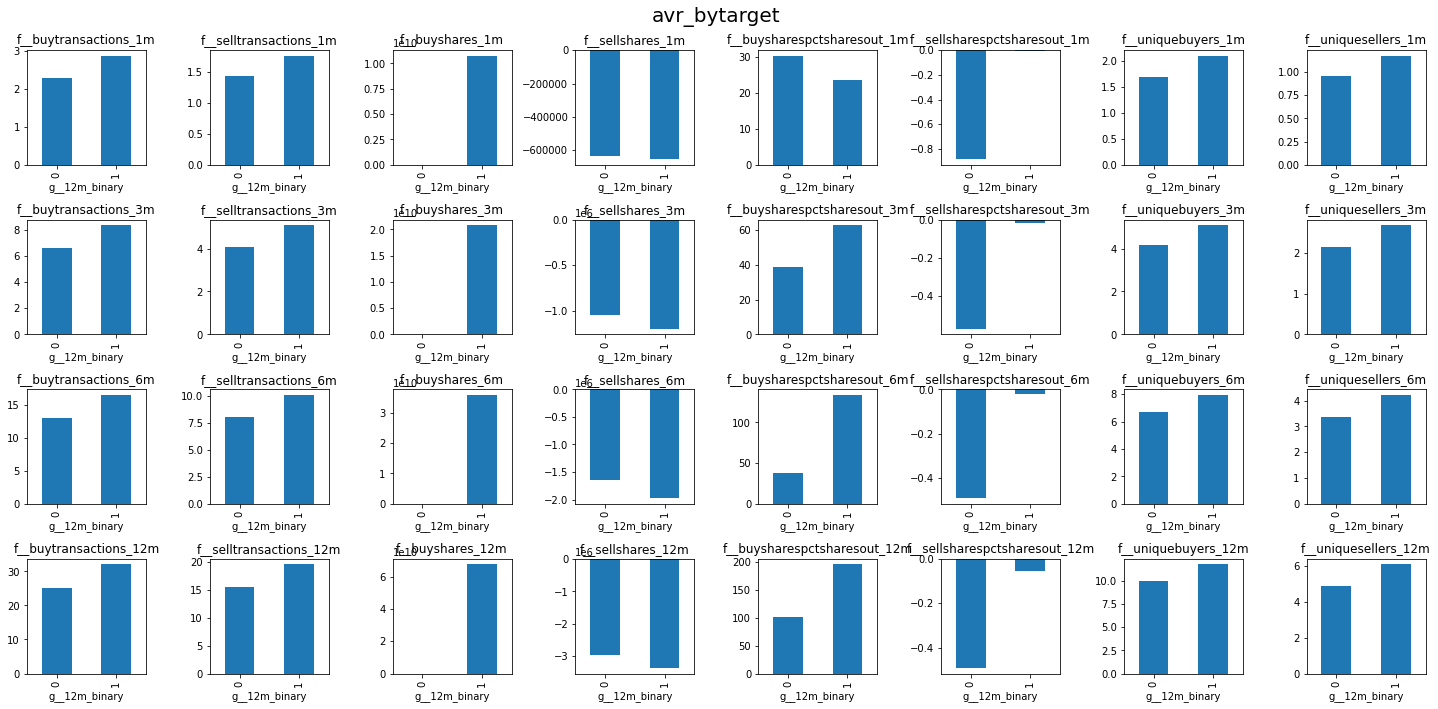

In [25]:
ncols = 8
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for idx, col in enumerate(columns_to_show):
    avr_bytarget[col].plot(kind='bar', ax=axes[idx // ncols, idx % ncols])
    axes[idx // ncols, idx % ncols].set_xlabel(target_col)
    axes[idx // ncols, idx % ncols].set_title(col)
plt.suptitle("avr_bytarget", fontsize=20)
plt.tight_layout()

### violinplot

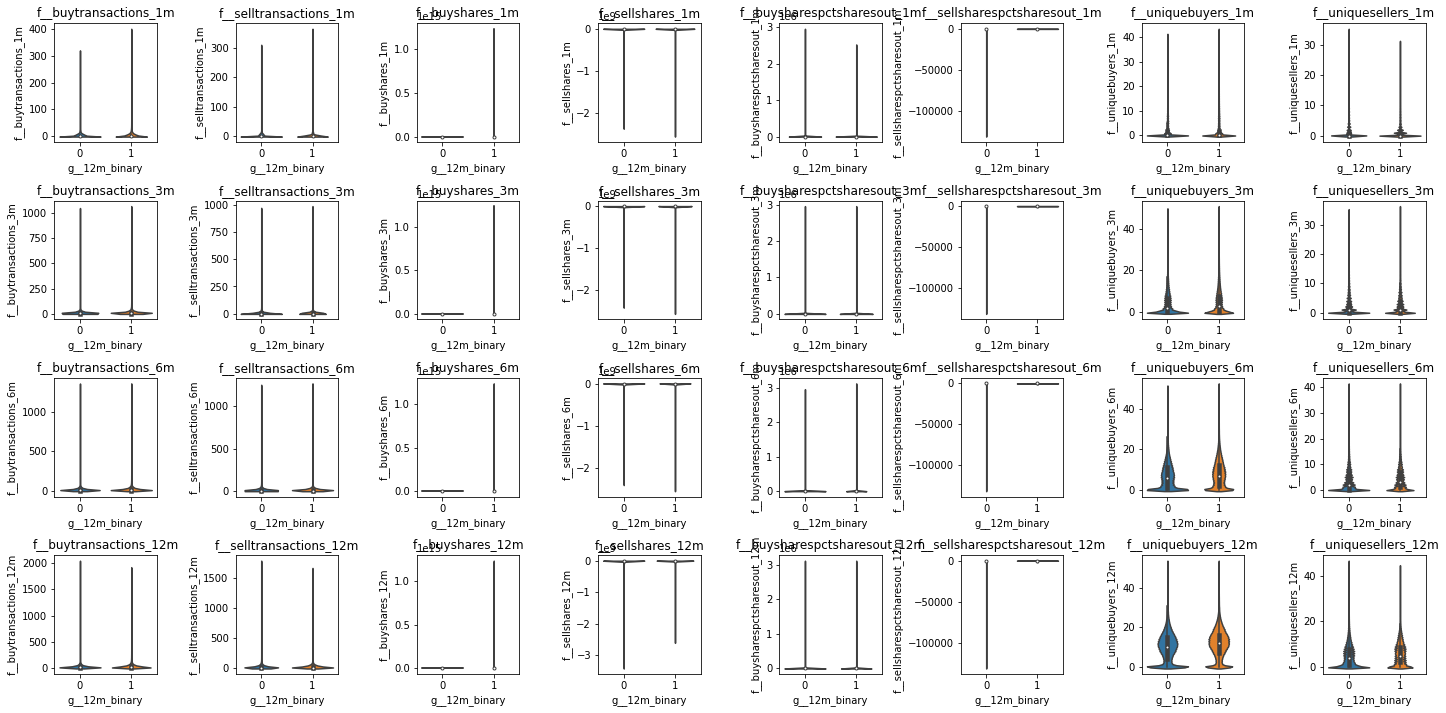

In [85]:
ncols = 8
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for idx, col in enumerate(columns_to_show):
    sns.violinplot(x=target_col, y=col, data=train, ax=axes[idx // ncols, idx % ncols])
    axes[idx // ncols, idx % ncols].set_xlabel(target_col)
    axes[idx // ncols, idx % ncols].set_title(col)
plt.tight_layout()

<AxesSubplot:>

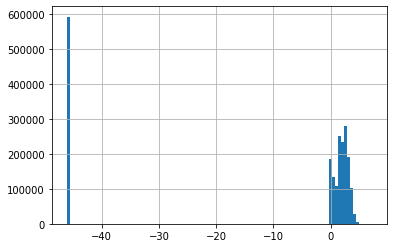

In [123]:
ncols = 8
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for idx, col in enumerate(columns_to_show):
    sns.distplot(train[col] + 1e-20, ax=axes[idx // ncols, idx % ncols])
plt.tight_layout()
np.log(train["f__selltransactions_6m"] + 1e-20).hist(bins=100)

c:\users\dsher\pycharmprojects\meson_insider\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='f__selltransactions_6m', ylabel='Density'>

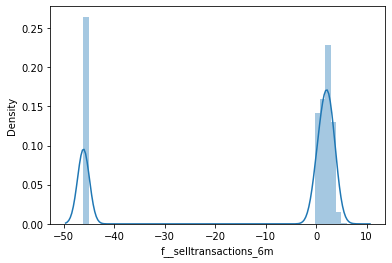

In [108]:
sns.distplot(np.log(train["f__selltransactions_6m"] + 1e-20))

<AxesSubplot:xlabel='f__selltransactions_6m', ylabel='Density'>

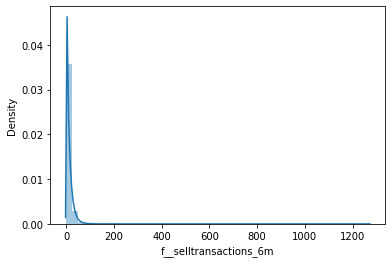

In [112]:
sns.distplot(train["f__selltransactions_6m"] + 1e-20)

### feature distribution

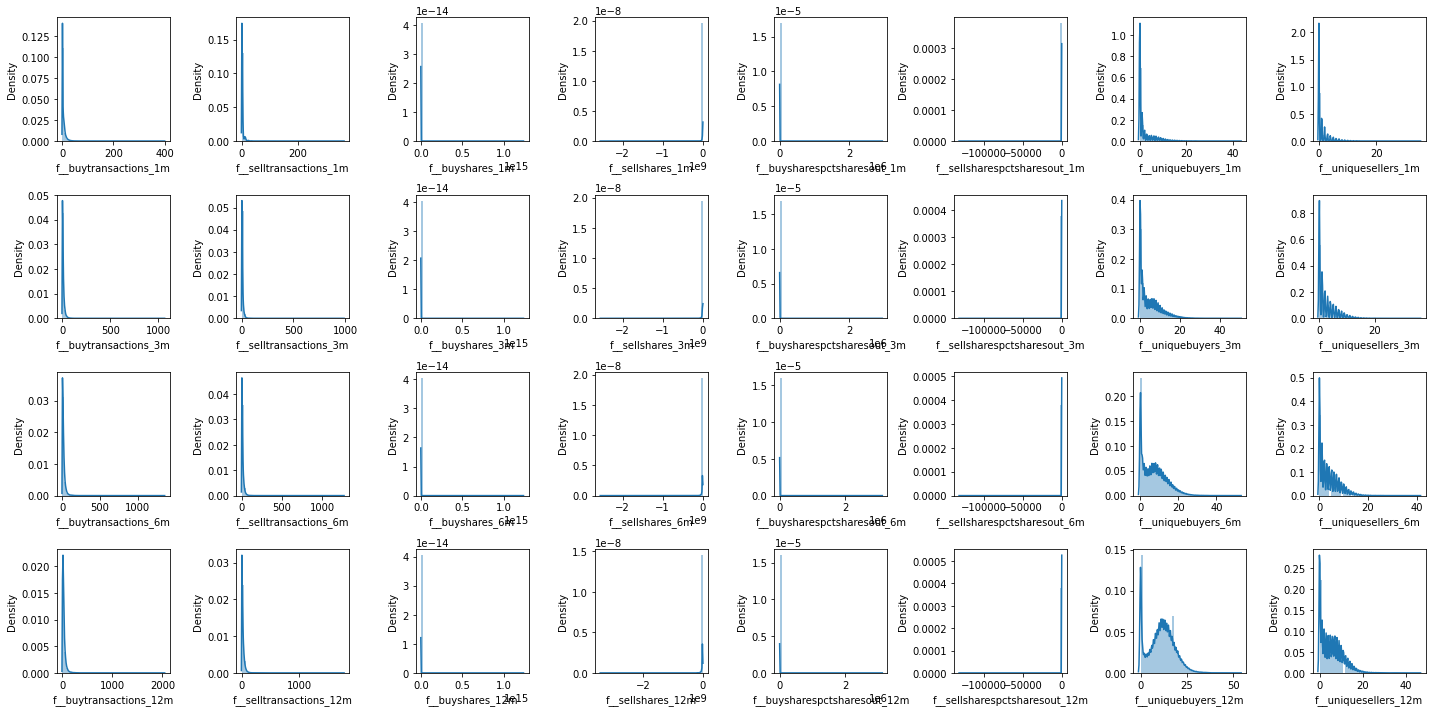

In [119]:
ncols = 8
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for idx, col in enumerate(columns_to_show):
    sns.distplot(train[col] + 1e-20, ax=axes[idx // ncols, idx % ncols])
plt.tight_layout()

## LOG FEATURE

### feature distribution after log

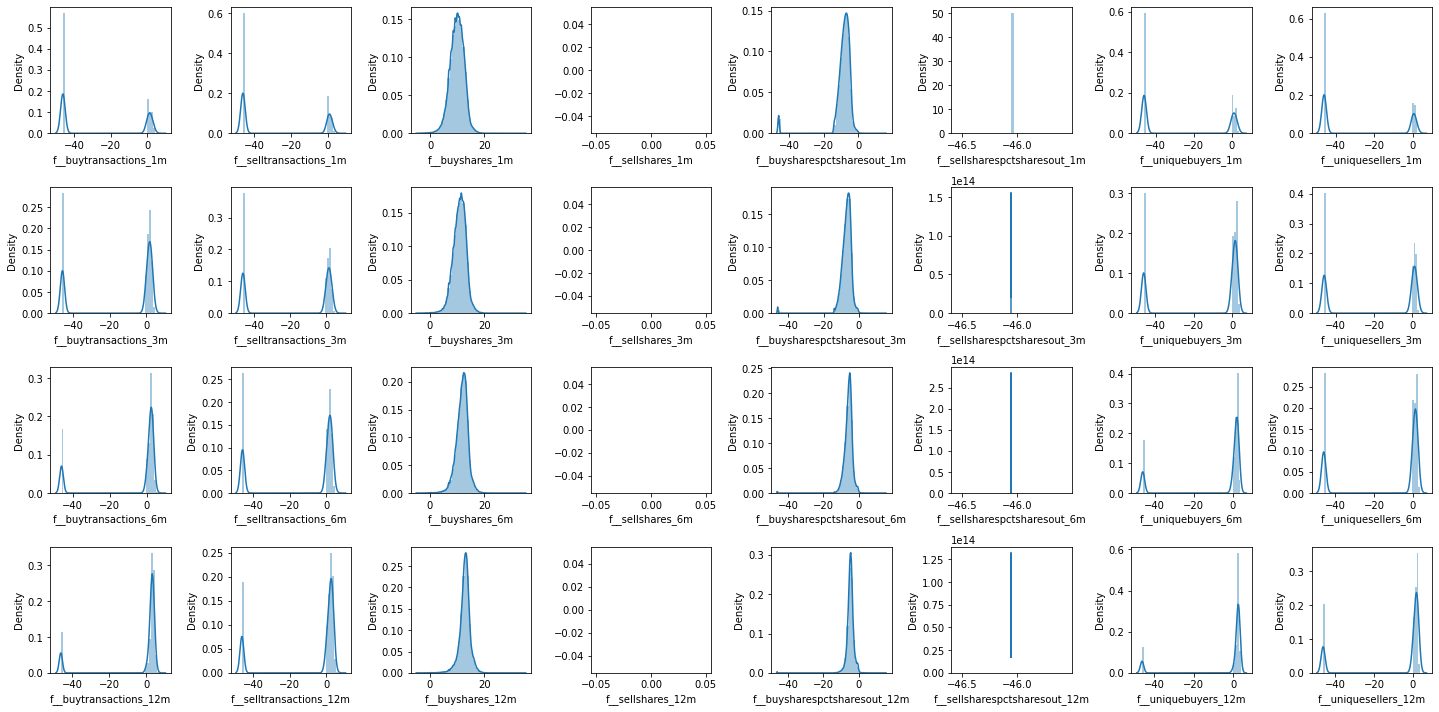

In [118]:
ncols = 8
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for idx, col in enumerate(columns_to_show):
    sns.distplot(np.log(train[col] + 1e-20), ax=axes[idx // ncols, idx % ncols])
plt.tight_layout()

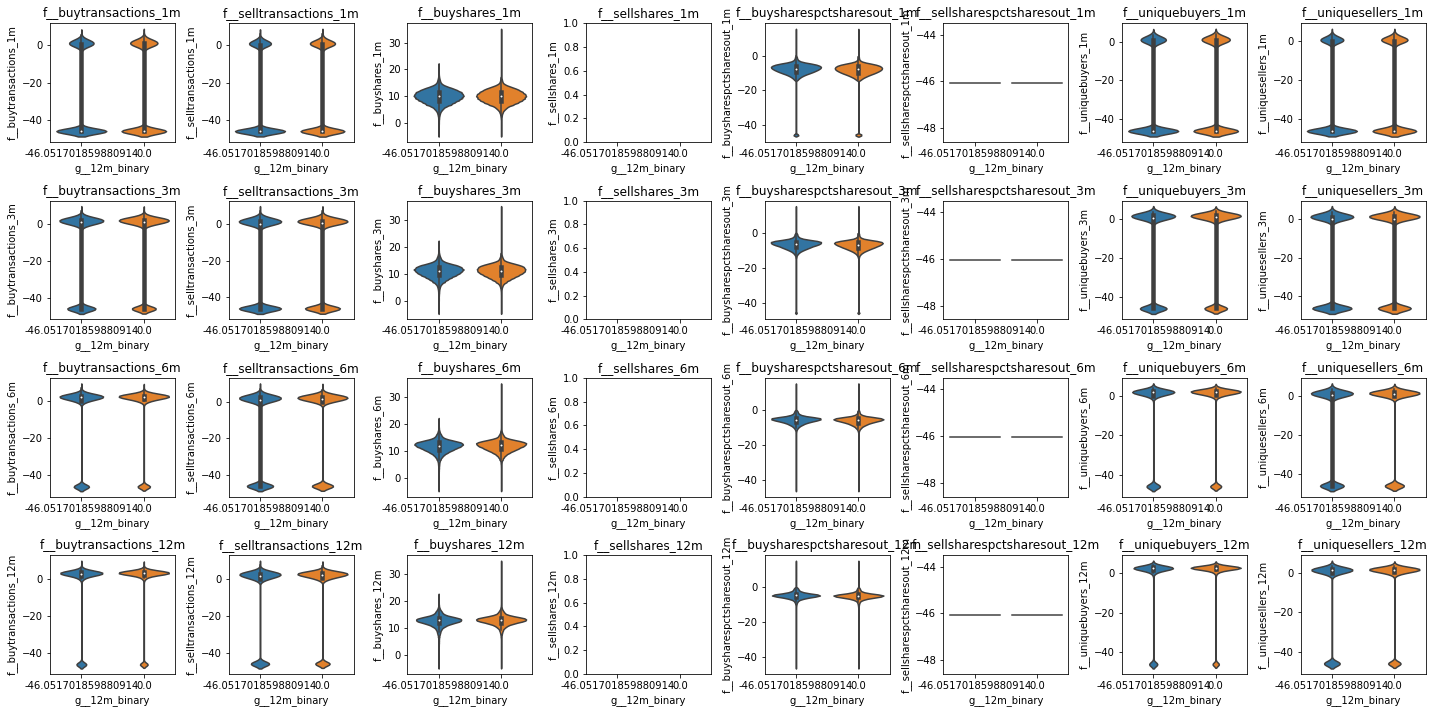

In [124]:
ncols = 8
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for idx, col in enumerate(columns_to_show):
    sns.violinplot(x=target_col, y=col, data=np.log(train + 1e-20), ax=axes[idx // ncols, idx % ncols])
    axes[idx // ncols, idx % ncols].set_xlabel(target_col)
    axes[idx // ncols, idx % ncols].set_title(col)
plt.tight_layout()